## COMP5625M Practical Assessment - Deep Learning [100 Marks]


<div class="logos"><img src="Comp5625M_logo.jpg" width="220px" align="right"></div>

This assessment is divided into two parts:
> 1. Image classification using DNN and CNN [70 Marks]
> 2. Use of RNN to predict texts for image captioning [30 Marks]

The maximum number of marks for each part is shown in the section headers. As indicated in the main heading above, the overall assessment carries a maximum of 100 marks.

This summative assessment is weighted 50% of the final grade for the module.


### Motivation 

Through this coursework, you will:

> 1. Understand and implement your first deep neural network and convolutional neural network (CNN) and see how these can be used for classification problem 
> 2. Practice building, evaluating, and finetuning your CNN on an image dataset from development to testing stage. 
> 3. You will learn to tackle overfitting problem using strategies such as data augmentation and drop out.
> 4. Compare your model performance and accuracy with others, such as the leaderboard on Kaggle
> 5. Use RNNs to predict the caption of an image from established word vocabularies
> 6. Understand and visualise text predictions for a given image.


### Setup and resources 

You must work using this provided template notebook.

Having a GPU will speed up the training process. See the provided document on Minerva about setting up a working environment for various ways to access a GPU.

Please implement the coursework using **Python and PyTorch**, and refer to the notebooks and exercises provided.


### Submission

Please submit the following:

> 1. Your completed Jupyter notebook file, without removing anything in the template, in **.ipynb format.**
> 2. The **.html version** of your notebook; File > Download as > HTML (.html). Check that all cells have been run and all outputs (including all graphs you would like to be marked) displayed in the .html for marking.
> 3. Your selected image from section 2.4.2 "Failure analysis"

Final note:

> **Please display everything that you would like to be marked. Under each section, put the relevant code containing your solution. You may re-use functions you defined previously, but any new code must be in the relevant section.** Feel free to add as many code cells as you need under each section.


Your student username (for example, ```sc15jb```): 

**mm23m2mia**

Your full name: 

**Mohamed Imthiyas Abdul Rasheeth**

### Part I: Image Classification [70 marks]

#### Dataset
This coursework will use a subset of images from Tiny ImageNet, which is a subset of the [ImageNet dataset](https://www.image-net.org/update-mar-11-2021.php). Our subset of Tiny ImageNet contains **30 different categories**, we will refer to it as TinyImageNet30. The training set has 450 resized images (64x64 pixels) for each category (13,500 images in total). You can download the training and test set from the Kaggle website:

>[Direct access of data is possible by clicking here, please use your university email to access this](https://leeds365-my.sharepoint.com/:u:/g/personal/scssali_leeds_ac_uk/ESF87mN6kelIkjdISkaRow8BublW27jB-P8eWV6Rr4rxtw?e=SPASDB)

>[To submit your results on the Kaggle competition. You can also access data here](https://www.kaggle.com/t/9105198471a3490d9057026d27d8a711)

To access the dataset, you will need an account on the Kaggle website. Even if you have an existing Kaggle account, please carefully adhere to these instructions, or we may not be able to locate your entries:

> 1. Use your **university email** to register a new account.
> 2. Set your **Kaggle account NAME** to your university username, for example, ``sc15jb`` (see the ``note`` below)

``Note:`` If the name is already taken in the Kaggle then please use a similar pseudo name and add a note in your submission with the name you have used in the Kaggle. 

#### Submitting your test result to Kaggle leaderboard 
The class Kaggle competition also includes a blind test set, which will be used in Question 1 for evaluating your custom model's performance on a test set. The competition website will compute the test set accuracy, as well as position your model on the class leaderboard. More information is provided in the related section below.


## Required packages

[1] [numpy](http://www.numpy.org) is package for scientific computing with python

[2] [h5py](http://www.h5py.org) is package to interact with compactly stored dataset

[3] [matplotlib](http://matplotlib.org) can be used for plotting graphs in python

[4] [pytorch](https://pytorch.org/docs/stable/index.html) is library widely used for bulding deep-learning frameworks

Feel free to add to this section as needed some examples for importing some libraries is provided for you below.

You may need to install these packages using [pip](https://pypi.org/project/opencv-python/) or [conda](https://anaconda.org/conda-forge/opencv).

In [1]:
#Importing all the necessary libraries
import math

import numpy as np
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torch.hub import load_state_dict_from_url

from PIL import Image
import matplotlib.pyplot as plt

/Applications/anaconda3/envs/PyTorch/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Applications/anaconda3/envs/PyTorch/lib/python3.10/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: <5AA8DD3D-A2CC-31CA-8060-88B4E9C18B09> /Applications/anaconda3/envs/PyTorch/lib/python3.10/site-packages/torchvision/image.so
  Expected in:     <A69D69E1-75EF-32C4-83CE-D9457021DE94> /Applications/anaconda3/envs/PyTorch/lib/python3.10/site-packages/torch/lib/libtorch_cpu.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [2]:
# always check your version
print(torch.__version__)

2.2.1


One challenge of building a deep learning model is to choose an architecture that can learn the features in the dataset without being unnecessarily complex. The first part of the coursework involves building a CNN and training it on TinyImageNet30. 

### **Overview of image classification:**

**1. Function implementation** [14 marks]

*   **1.1** PyTorch ```Dataset``` and ```DataLoader``` classes (4 marks)
*   **1.2** PyTorch ```Model``` class for a simple MLP model (4 marks)
*   **1.3** PyTorch ```Model``` class for a simple CNN model (6 marks)

**2. Model training** [30 marks]
*   **2.1** Training on TinyImageNet30 dataset (6 marks)
*   **2.2** Generating confusion matrices and ROC curves (6 marks)
*   **2.3** Strategies for tackling overfitting (18 marks)
    *   **2.3.1** Data augmentation
    *   **2.3.2** Dropout
    *   **2.3.3** Hyperparameter tuning (e.g. changing learning rate)
            
**3. Model testing** [10 marks]
*   **3.1**   Testing your final model in (2) on test set - code to do this (4 marks)
*   **3.2**   Uploading your result to Kaggle  (6 marks)

**4. Model Fine-tuning on CIFAR10 dataset** [16 marks]
*   **4.1** Fine-tuning your model (initialise your model with pretrained weights from (2)) (6 marks)
*   **4.2** Fine-tuning model with frozen base convolution layers (6 marks)
*   **4.3** Compare complete model retraining with pretrained weights and with frozen layers. Comment on what you observe. (4 marks) 


<!-- **5. Model comparison** [16 marks]
*   **5.1**   Load pretrained AlexNet and finetune on TinyImageNet30 until model convergence (8 marks)
*   **5.2**   Compare the results of your model with pretrained AlexNet on the same validation set. Provide performance values (loss graph, confusion matrix, top-1 accuracy, execution time) (8 marks) -->
<!-- 
**6. Interpretation of results** (14 marks)
*   **6.1** Implement grad-CAM for your model and AlexNet (6 marks)
*   **6.2** Visualise and compare your results from your model and AlexNet (4 marks)
*   **6.3** Provide comment on (4 marks)
    - why the network predictions were correct or not correct in your predictions? 
    - what can you do to improve your results further?

**7. Residual connection for deeper network** (9 marks)
*   **7.1** Implement a few residual layers in AlexNet and retrain on TinyImageNet30. You can change network size if you wish. (6 marks)
*   **7.2** Comment on why such connections are important and why this impacted your results in terms of loss and accuracy (if it did!) (3 marks)

**Quality of your report** (2 marks) -->


## 1 Function implementations [14 marks]


### 1.1 Dataset class (4 marks)

Write a PyTorch ```Dataset``` class (an example [here](https://www.askpython.com/python-modules/pytorch-custom-datasets) for reference) which loads the TinyImage30 dataset and ```DataLoaders``` for training and validation sets.

In [3]:

#from tiny_imagenet_dataset import TinyImageNet30Dataset #importing the dataset class
import torch
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import transforms
from PIL import Image
import os

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'mps')

We will comment out the below class code block and instead save this class as a new Python file. We will import it into the python notebook to avoid runtime error and proper execution.

(Note: Kindly consider these codes below and in the saved python file while **marking**.)

In [5]:
import os
from torch.utils.data import Dataset
from torchvision import transforms
from PIL import Image



class TinyImageNet30Dataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data_dir = data_dir
        self.transform = transform
        self.image_paths = []
        self.labels = []

        # Define a list of valid image extensions
        valid_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.gif']

        self.label_to_int = {}
        label_id = 0

        for class_dir in sorted(os.listdir(data_dir)):
            class_dir_path = os.path.join(data_dir, class_dir)
            if os.path.isdir(class_dir_path):
                if class_dir not in self.label_to_int:
                    self.label_to_int[class_dir] = label_id
                    label_id += 1

                for img_file in sorted(os.listdir(class_dir_path)):
                    # Check if the file is an image with a valid extension before adding
                    if os.path.splitext(img_file)[1].lower() in valid_extensions:
                        self.image_paths.append(os.path.join(class_dir_path, img_file))
                        self.labels.append(self.label_to_int[class_dir])

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert('RGB')  # Ensure image is RGB

        if self.transform:
            image = self.transform(image)

        label = self.labels[idx]
        return image, label

In [7]:
# Defining transformations 
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load the training and test datasets
full_dataset = TinyImageNet30Dataset(data_dir='Dataset/train_set', transform=transform)
# Splitting dataset
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size], generator=torch.Generator().manual_seed(0))

test_dataset = TinyImageNet30Dataset(data_dir='Dataset/test_set', transform=transform)

# Create DataLoaders for training and test sets
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

### 1.2 Define a MLP model class (4 marks)

<u>Create a new model class using a combination of:</u>
- Input Units
- Hidden Units
- Output Units
- Activation functions
- Loss function
- Optimiser

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim

class SimpleMLP(nn.Module):
    def __init__(self, input_size=12288, hidden_size=512, num_classes=30):
        super(SimpleMLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the image
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Train the model
model_mlp = SimpleMLP()

In [9]:

# Define the loss function and optimizer for the MLP model
loss_function_mlp = nn.CrossEntropyLoss() 
optimizer_mlp= optim.Adam(model_mlp.parameters(), lr=0.001)

### 1.3 Define a CNN model class (6 marks)

<u>Create a new model class using a combination of:</u>
- Convolution layers
- Activation functions (e.g. ReLU)
- Maxpooling layers
- Fully connected layers 
- Loss function
- Optimiser

*Please note that the network should be at least a few layers for the model to perform well.*

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim

class SimpleCNN(nn.Module):
    def __init__(self, num_classes=30):  #TinyImageNet30 has 30 classes
        super(SimpleCNN, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        
        self.classifier = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(256 * 8 * 8, 1024),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(1024, num_classes),
        )
    
    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x


In [11]:
#device = torch.device("mps" if torch.backends.mps.is_available() else "cpu") # Using MPS (multi-processing service) if available, since we use Apple Mac M1

model_cnn = SimpleCNN().to(device)

# Defining the loss function and optimizer for the CNN model
loss_function_cnn = nn.CrossEntropyLoss()
optimizer_cnn = optim.Adam(model_cnn.parameters(), lr=0.001)

## 2 Model training [30 marks]


### 2.1 Train both MLP and CNN model - show loss and accuracy graphs side by side (6 marks)

Train your model on the TinyImageNet30 dataset. Split the data into train and validation sets to determine when to stop training. Use seed at 0 for reproducibility and test_ratio=0.2 (validation data)

Display the graph of training and validation loss over epochs and accuracy over epochs to show how you determined the optimal number of training epochs. A top-*k* accuracy implementation is provided for you below.

> Please leave the graph clearly displayed. Please use the same graph to plot graphs for both train and validation.


In [12]:

model_mlp = model_mlp.to(device)

In [13]:
def topk_accuracy(output, target, topk=(1,)):
    """Computes the precision@k for the specified values of k"""
    maxk = max(topk)
    batch_size = target.size(0)
    _, pred = output.topk(maxk, 1, True, True)
    pred = pred.t()
    correct = pred.eq(target.view(1, -1).expand_as(pred))

    res = []
    for k in topk:
        correct_k = correct[:k].reshape(-1).float().sum(0)  # Changed from .view(-1) to .reshape(-1)
        res.append(correct_k.mul_(100.0 / batch_size))
    return res


In [14]:
import torch.nn as nn

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()


In [15]:
def train_and_evaluate(model, train_loader, val_loader, optimizer, criterion, epochs=10, device='mps', topk=(1, 5)):
    # Initialize history dictionary
    history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}
    for k in topk:
        history[f'val_top{k}_acc'] = []

    model.to(device)
    for epoch in range(epochs):
        # Training phase
        model.train()
        running_loss, running_corrects, total_samples = 0.0, 0, 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            _, preds = torch.max(outputs, 1)
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data).float()  # Use .float() for compatibility
            total_samples += labels.size(0)

        epoch_loss = running_loss / total_samples
        epoch_acc = running_corrects / total_samples
        history['train_loss'].append(epoch_loss)
        history['train_acc'].append(epoch_acc.item())

        # Validation phase
        model.eval()
        val_running_loss, val_running_corrects, val_total_samples = 0.0, 0, 0
        topk_accs = {k: 0 for k in topk}
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)

                val_running_loss += loss.item() * inputs.size(0)
                _, preds = torch.max(outputs, 1)
                val_running_corrects += torch.sum(preds == labels.data).float()  # Use .float(), since we use MPS and we work in Apple Silicon Mac.
                val_total_samples += labels.size(0)

                # Compute top-k accuracies
                accs = topk_accuracy(outputs, labels, topk=topk)
                for k, acc in zip(topk, accs):
                    topk_accs[k] += acc.item()

        val_epoch_loss = val_running_loss / val_total_samples
        val_epoch_acc = val_running_corrects / val_total_samples
        history['val_loss'].append(val_epoch_loss)
        history['val_acc'].append(val_epoch_acc.item())
        
        for k in topk:
            history[f'val_top{k}_acc'].append(topk_accs[k] / len(val_loader))

        
        # Print epoch results
        print(f'Epoch {epoch+1}/{epochs} - Train Loss: {epoch_loss:.4f}, Train Acc: {epoch_acc:.4f}, Val Loss: {val_epoch_loss:.4f}, Val Acc: {val_epoch_acc:.4f}', end='')
        for k in topk:
            print(f', Val Top-{k} Acc: {history[f"val_top{k}_acc"][-1]:.4f}', end='')
        print()  


    return history


In [16]:
def plot_history_with_topk(history, topk=(1, 5)):
    epochs = range(1, len(history['train_loss']) + 1)
    
    plt.figure(figsize=(18, 6))
    
    # Plot training and validation loss
    plt.subplot(1, 3, 1)
    plt.plot(epochs, history['train_loss'], label='Training Loss')
    plt.plot(epochs, history['val_loss'], label='Validation Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Plot training and validation accuracy
    plt.subplot(1, 3, 2)
    plt.plot(epochs, history['train_acc'], label='Training Accuracy')
    plt.plot(epochs, history['val_acc'], label='Validation Accuracy')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    # Plot top-k accuracies
    plt.subplot(1, 3, 3)
    for k in topk:
        plt.plot(epochs, history[f'val_top{k}_acc'], label=f'Top-{k} Accuracy')
    plt.title('Top-k Accuracy over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.show()


Epoch 1/10 - Train Loss: 5.4046, Train Acc: 0.1298, Val Loss: 4.7778, Val Acc: 0.1474, Val Top-1 Acc: 14.6197, Val Top-5 Acc: 42.3207
Epoch 2/10 - Train Loss: 3.2462, Train Acc: 0.2749, Val Loss: 4.1002, Val Acc: 0.1581, Val Top-1 Acc: 15.9884, Val Top-5 Acc: 44.9249
Epoch 3/10 - Train Loss: 2.4669, Train Acc: 0.3909, Val Loss: 4.3233, Val Acc: 0.1615, Val Top-1 Acc: 16.4729, Val Top-5 Acc: 46.1604
Epoch 4/10 - Train Loss: 2.0586, Train Acc: 0.4880, Val Loss: 4.4621, Val Acc: 0.1715, Val Top-1 Acc: 17.2965, Val Top-5 Acc: 46.8871
Epoch 5/10 - Train Loss: 1.8318, Train Acc: 0.5462, Val Loss: 5.0598, Val Acc: 0.1678, Val Top-1 Acc: 16.6182, Val Top-5 Acc: 45.0945
Epoch 6/10 - Train Loss: 1.7632, Train Acc: 0.5758, Val Loss: 5.3252, Val Acc: 0.1726, Val Top-1 Acc: 17.0906, Val Top-5 Acc: 47.1536
Epoch 7/10 - Train Loss: 1.7682, Train Acc: 0.6090, Val Loss: 6.1995, Val Acc: 0.1774, Val Top-1 Acc: 17.7204, Val Top-5 Acc: 46.4632
Epoch 8/10 - Train Loss: 1.7232, Train Acc: 0.6381, Val Loss: 

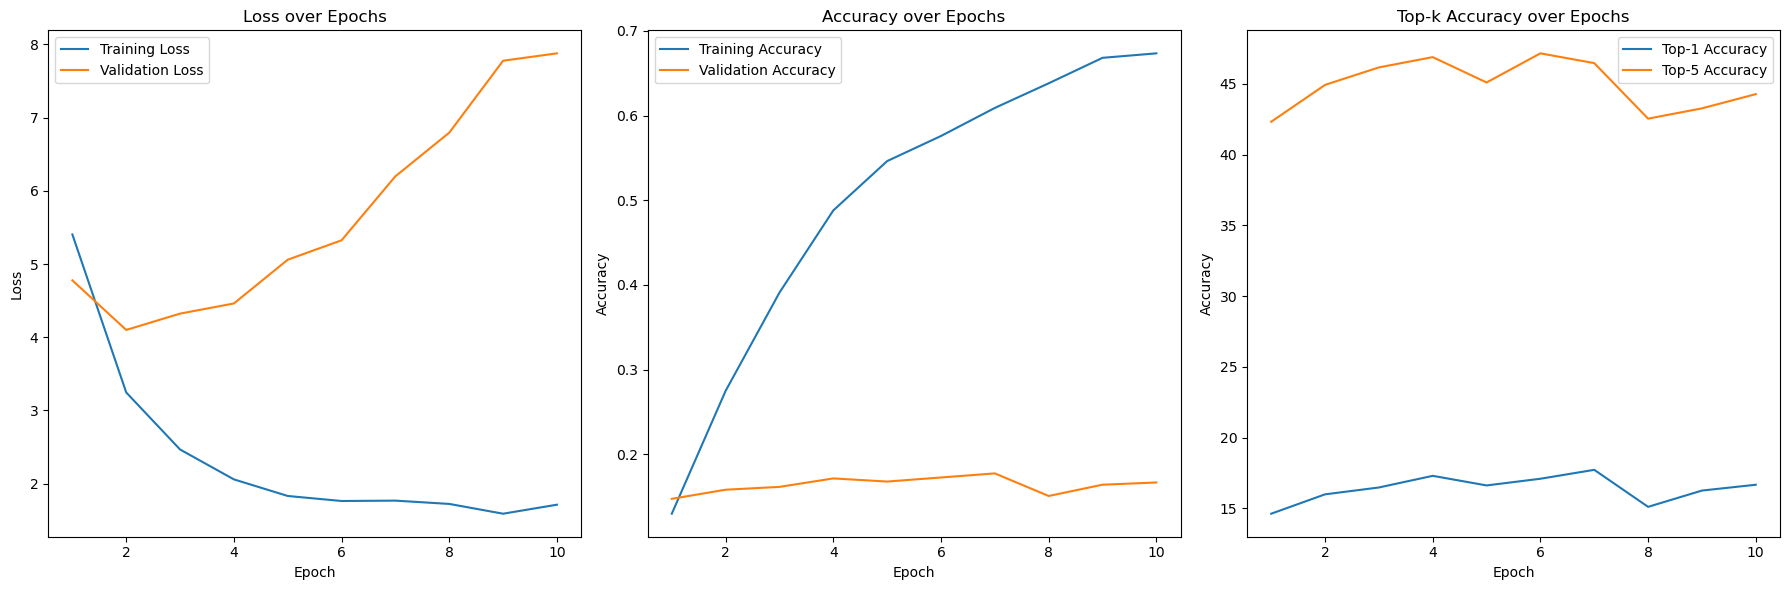

In [18]:
#TO COMPLETE --> Running your MLP model class
history_mlp = train_and_evaluate(model_mlp, train_loader, val_loader, optimizer_mlp, criterion, epochs=10, device='mps', topk=(1, 5))

plot_history_with_topk(history_mlp, topk=(1, 5))


Epoch 1/10 - Train Loss: 1.4682, Train Acc: 0.5576, Val Loss: 1.9190, Val Acc: 0.4537, Val Top-1 Acc: 45.1429, Val Top-5 Acc: 79.5422
Epoch 2/10 - Train Loss: 1.2978, Train Acc: 0.6053, Val Loss: 1.9075, Val Acc: 0.4626, Val Top-1 Acc: 46.1725, Val Top-5 Acc: 79.7723
Epoch 3/10 - Train Loss: 1.1251, Train Acc: 0.6462, Val Loss: 1.9855, Val Acc: 0.4552, Val Top-1 Acc: 45.9181, Val Top-5 Acc: 79.1303
Epoch 4/10 - Train Loss: 0.9843, Train Acc: 0.6974, Val Loss: 1.9682, Val Acc: 0.4700, Val Top-1 Acc: 47.2141, Val Top-5 Acc: 79.6996
Epoch 5/10 - Train Loss: 0.8482, Train Acc: 0.7368, Val Loss: 2.0366, Val Acc: 0.4667, Val Top-1 Acc: 46.5722, Val Top-5 Acc: 79.2393
Epoch 6/10 - Train Loss: 0.7352, Train Acc: 0.7683, Val Loss: 2.1589, Val Acc: 0.4748, Val Top-1 Acc: 47.8440, Val Top-5 Acc: 79.6027
Epoch 7/10 - Train Loss: 0.6384, Train Acc: 0.8009, Val Loss: 2.0495, Val Acc: 0.4715, Val Top-1 Acc: 47.6744, Val Top-5 Acc: 80.6928
Epoch 8/10 - Train Loss: 0.5991, Train Acc: 0.8112, Val Loss: 

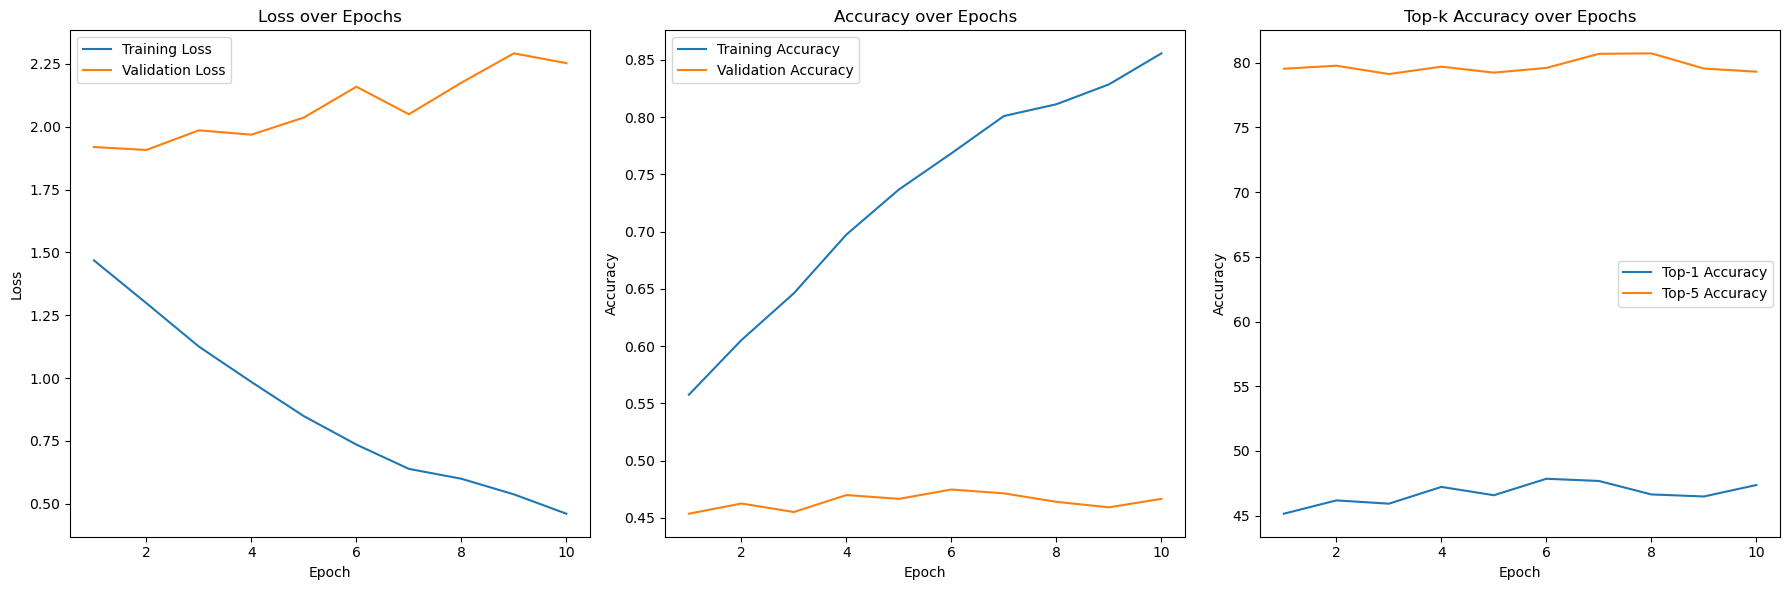

In [20]:
#TO COMPLETE --> Running your CNN model class
history_cnn = train_and_evaluate(model_cnn, train_loader, val_loader, optimizer_cnn, criterion, epochs=10, device='mps', topk=(1, 5))

plot_history_with_topk(history_cnn, topk=(1, 5))


> Comment on your model and the results you have obtained. This should include the number of parameters for each of your models and briefly explain why one should use CNN over MLP for the image classification problem.

As we can see from the graphs above, we can see that we have a better model when we use CNN over MLP. The accuracy is getting improved significantly for CNN during each epochs and the CNN is a sophisticated model to use for Image Recognition and is highly efficient. The time taken to train the CNN model is greatly less than that of the MLP model. Overall, the primary reason to choose the CNN model is that it gives accurately trained model, while the MLP gives us the overfitted trained model. We find the overfitting when the loss function of training dataset decreases, the loss function of validation dataset increases.

We have chosen 15 epochs for CNN, while 10 epochs for MLP. These selections are made based on the instinct, time required to train the model and repetitive training to find the reasonable number of epochs needed.

### 2.2 Generating confusion matrix and ROC curves (6 marks)
- Use your CNN architecture with best accuracy to generate two confusion matrices, one for the training set and another for the validation set. Remember to use the whole validation and training sets, and to include all your relevant code. Display the confusion matrices in a meaningful way which clearly indicates what percentage of the data is represented in each position.
- Display an ROC curve for the two top and two bottom classes with area under the curve

In [21]:
def get_predictions_and_labels(model, dataloader, device):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    return np.array(all_preds), np.array(all_labels)

# Assuming your model is named model_cnn and is already trained and moved to the correct device
train_preds, train_labels = get_predictions_and_labels(model_cnn, train_loader, device)
val_preds, val_labels = get_predictions_and_labels(model_cnn, val_loader, device)


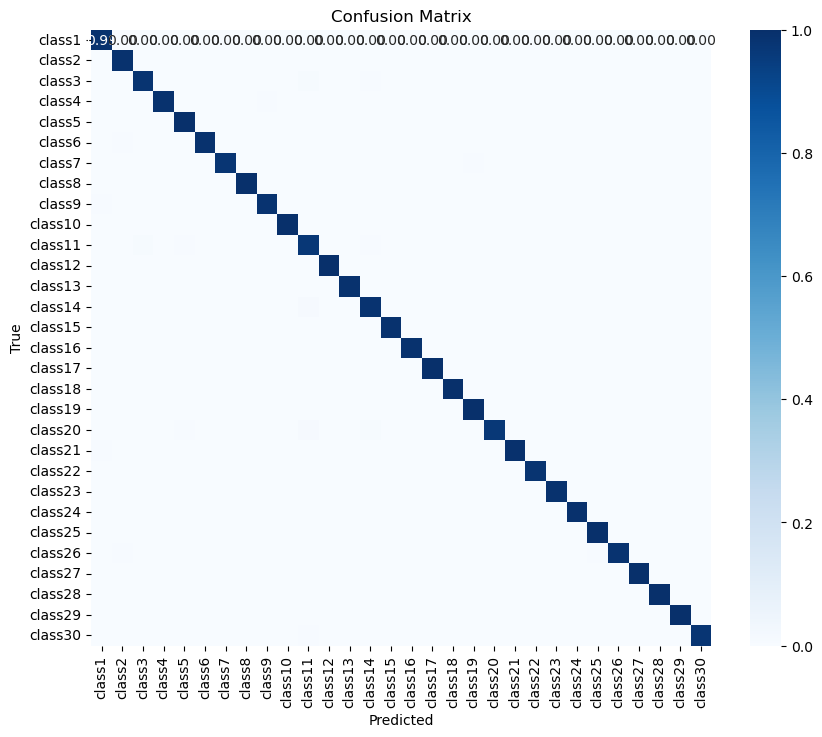

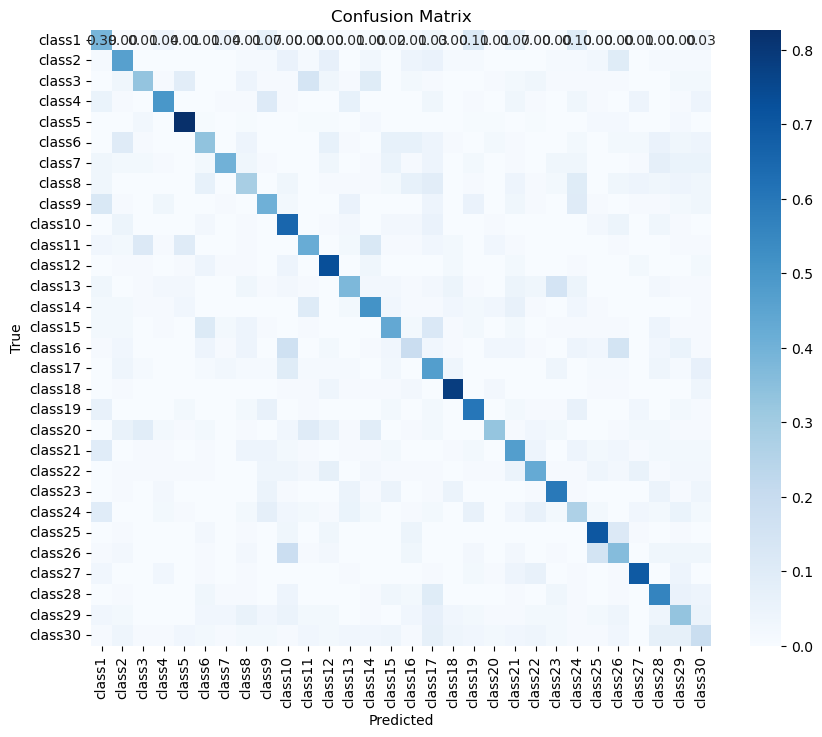

In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(true_labels, predictions, class_names):
    cm = confusion_matrix(true_labels, predictions, normalize='true')
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

class_names = ['class1', 'class2', 'class3', 'class4', 'class5', 'class6', 'class7', 'class8', 'class9', 'class10', 'class11', 'class12', 'class13', 'class14', 'class15', 'class16', 'class17', 'class18', 'class19', 'class20', 'class21', 'class22', 'class23', 'class24', 'class25', 'class26', 'class27', 'class28', 'class29', 'class30']  # Adjust according to your classes
plot_confusion_matrix(train_labels, train_preds, class_names)
plot_confusion_matrix(val_labels, val_preds, class_names)


**Note: All questions below here relates to the CNN model only and not an MLP model! You are advised to use your final CNN model only for each of the questions below.**

### 2.3 Strategies for tackling overfitting (18 marks)
Using your (final) CNN model perform the strategies below to avoid overfitting problems. You can resuse the network weights from previous training, often referred to as ``fine tuning``. 
*   **2.3.1** Data augmentation
*   **2.3.2** Dropout
*   **2.3.3** Hyperparameter tuning (e.g. changing learning rate)

> Plot loss and accuracy graphs per epoch side by side for each implemented strategy.

#### 2.3.1 Data augmentation (6 marks)

> Implement at least five different data augmentation techniques that should include both photometric and geometric augmentations. 

> Provide graphs and comment on what you observe.


In [25]:
# Your code here!
from torchvision import datasets, transforms

# Data augmentation transformations
augmentation_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),  # Rotate by ±20 degrees
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomPerspective(distortion_scale=0.2, p=0.5),
    transforms.RandomVerticalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Apply the transformations to your training dataset
augmented_train_dataset = TinyImageNet30Dataset(data_dir='data/train_set', transform=augmentation_transforms)
augmented_train_loader = DataLoader(augmented_train_dataset, batch_size=32, shuffle=True)

# Now let's train the model using the augmented data
# Make sure to instantiate and prepare your model for training again as needed
history_data_augmentation = train_and_evaluate(model_cnn, augmented_train_loader, val_loader, optimizer_cnn, criterion, epochs=10, device=device)


Epoch 1/10 - Train Loss: 2.7946, Train Acc: 0.2267, Val Loss: 2.0645, Val Acc: 0.4322, Val Top-1 Acc: 43.3503, Val Top-5 Acc: 76.9501
Epoch 2/10 - Train Loss: 2.4801, Train Acc: 0.2886, Val Loss: 2.0213, Val Acc: 0.4270, Val Top-1 Acc: 42.5266, Val Top-5 Acc: 77.8464
Epoch 3/10 - Train Loss: 2.4049, Train Acc: 0.3076, Val Loss: 1.8990, Val Acc: 0.4456, Val Top-1 Acc: 44.5010, Val Top-5 Acc: 79.2030
Epoch 4/10 - Train Loss: 2.3248, Train Acc: 0.3341, Val Loss: 1.8868, Val Acc: 0.4578, Val Top-1 Acc: 45.5426, Val Top-5 Acc: 80.9351
Epoch 5/10 - Train Loss: 2.2859, Train Acc: 0.3364, Val Loss: 1.8420, Val Acc: 0.4659, Val Top-1 Acc: 46.1846, Val Top-5 Acc: 81.2621
Epoch 6/10 - Train Loss: 2.2657, Train Acc: 0.3440, Val Loss: 1.8350, Val Acc: 0.4659, Val Top-1 Acc: 46.4995, Val Top-5 Acc: 80.3900
Epoch 7/10 - Train Loss: 2.2110, Train Acc: 0.3590, Val Loss: 1.7747, Val Acc: 0.4833, Val Top-1 Acc: 47.8924, Val Top-5 Acc: 82.5460
Epoch 8/10 - Train Loss: 2.1775, Train Acc: 0.3667, Val Loss: 

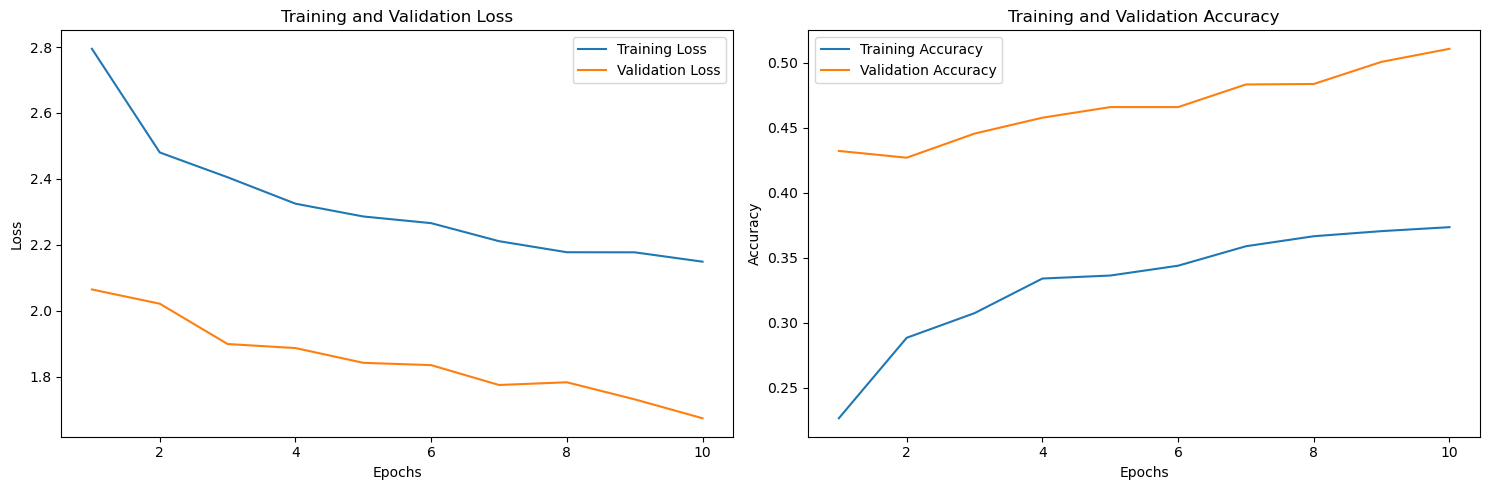

In [26]:
def plot_loss_and_accuracy(history):
    epochs = range(1, len(history['train_loss']) + 1)
    
    plt.figure(figsize=(15, 5))
    
    # Plot training and validation loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history['train_loss'], label='Training Loss')
    plt.plot(epochs, history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    # Plot training and validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history['train_acc'], label='Training Accuracy')
    plt.plot(epochs, history['val_acc'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Plot the loss and accuracy for the model trained with data augmentation
plot_loss_and_accuracy(history_data_augmentation)


#### 2.3.2 Dropout (6 marks)

> Implement dropout in your model 

> Provide graphs and comment on your choice of proportion used.

In [19]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class ImprovedCNN(nn.Module):
    def __init__(self):
        super(ImprovedCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1) 
        self.bn1 = nn.BatchNorm2d(32)  # Batch normalization
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)  
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)  # Additional conv layer
        self.bn3 = nn.BatchNorm2d(128)
        self.relu = nn.ReLU()
        self.maxpool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 8 * 8, 128)  # Adjust for pooling
        self.dropout = nn.Dropout(0.25)  # Dropout layer
        self.fc2 = nn.Linear(128, 30)

    def forward(self, x):
        x = self.maxpool(self.relu(self.bn1(self.conv1(x))))
        x = self.maxpool(self.relu(self.bn2(self.conv2(x))))
        x = self.maxpool(self.relu(self.bn3(self.conv3(x))))
        x = x.view(-1, 128 * 8 * 8)
        x = self.dropout(self.relu(self.fc1(x)))  # Apply dropout
        x = self.fc2(x)
        return x

# Instantiate and train your model with dropout
model_cnn_dropout = ImprovedCNN()
optimizer_cnn = optim.Adam(model_cnn_dropout.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()
# ... Continue with training and evaluation as usual
history_dropout = train_and_evaluate(model_cnn_dropout, train_loader, val_loader, optimizer_cnn, criterion, epochs=10, device=device)





Epoch 1/10 - Train Loss: 3.1424, Train Acc: 0.1231, Val Loss: 2.7280, Val Acc: 0.2170, Val Top-1 Acc: 21.6085, Val Top-5 Acc: 54.3847
Epoch 2/10 - Train Loss: 2.6919, Train Acc: 0.2206, Val Loss: 2.4258, Val Acc: 0.3022, Val Top-1 Acc: 29.9661, Val Top-5 Acc: 65.4797
Epoch 3/10 - Train Loss: 2.4759, Train Acc: 0.2628, Val Loss: 2.3182, Val Acc: 0.3230, Val Top-1 Acc: 32.0010, Val Top-5 Acc: 69.8038
Epoch 4/10 - Train Loss: 2.3878, Train Acc: 0.2923, Val Loss: 2.3052, Val Acc: 0.3181, Val Top-1 Acc: 31.5286, Val Top-5 Acc: 70.0097
Epoch 5/10 - Train Loss: 2.2967, Train Acc: 0.3145, Val Loss: 2.1689, Val Acc: 0.3763, Val Top-1 Acc: 37.7059, Val Top-5 Acc: 73.3891
Epoch 6/10 - Train Loss: 2.2313, Train Acc: 0.3270, Val Loss: 2.1855, Val Acc: 0.3744, Val Top-1 Acc: 37.3668, Val Top-5 Acc: 73.4738
Epoch 7/10 - Train Loss: 2.1655, Train Acc: 0.3446, Val Loss: 2.1435, Val Acc: 0.3763, Val Top-1 Acc: 37.2335, Val Top-5 Acc: 75.2301
Epoch 8/10 - Train Loss: 2.0826, Train Acc: 0.3726, Val Loss: 

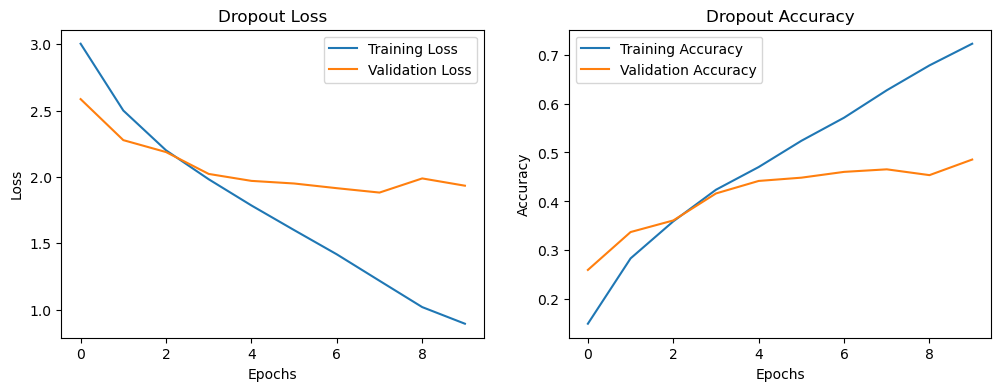

In [31]:
# Function to plot history
def plot_history(history, title=''):
    plt.figure(figsize=(12, 4))
    
    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(history['train_loss'], label='Training Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title(f'{title} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history['train_acc'], label='Training Accuracy')
    plt.plot(history['val_acc'], label='Validation Accuracy')
    plt.title(f'{title} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.show()
plot_history(history_dropout, title='Dropout')

We can see the accuracy fluctuates as the epochs increase. We chose 0.25 and 0.5 as dropout proportions to keep the probability of dropping out each neuron during training stable.

#### 2.3.3 Hyperparameter tuning (6 marks)

> Use learning rates [0.1, 0.001, 0.0001].

> Provide graphs each for loss and accuracy at three different learning rates in a single graph.

In [32]:
model_cnn_dropout = SimpleCNNwithDropout()
optimizer_cnn = optim.Adam(model_cnn_dropout.parameters(), lr=0.1)
# ... Continue with training and evaluation as usual
history_dropout_1 = train_and_evaluate(model_cnn_dropout, train_loader, val_loader, optimizer_cnn, criterion, epochs=10, device=device)

Epoch 1/10 - Train Loss: 33574.6355, Train Acc: 0.0329, Val Loss: 3.4149, Val Acc: 0.0333, Val Top-1 Acc: 3.2703, Val Top-5 Acc: 17.4540
Epoch 2/10 - Train Loss: 3.4164, Train Acc: 0.0339, Val Loss: 3.4183, Val Acc: 0.0322, Val Top-1 Acc: 3.1613, Val Top-5 Acc: 17.0179
Epoch 3/10 - Train Loss: 3.4176, Train Acc: 0.0332, Val Loss: 3.4155, Val Acc: 0.0333, Val Top-1 Acc: 3.2703, Val Top-5 Acc: 15.7825
Epoch 4/10 - Train Loss: 3.4189, Train Acc: 0.0311, Val Loss: 3.4126, Val Acc: 0.0385, Val Top-1 Acc: 3.7791, Val Top-5 Acc: 17.7447
Epoch 5/10 - Train Loss: 3.4177, Train Acc: 0.0323, Val Loss: 3.4134, Val Acc: 0.0322, Val Top-1 Acc: 3.3188, Val Top-5 Acc: 16.6667
Epoch 6/10 - Train Loss: 3.4179, Train Acc: 0.0326, Val Loss: 3.4205, Val Acc: 0.0337, Val Top-1 Acc: 3.3067, Val Top-5 Acc: 16.0732
Epoch 7/10 - Train Loss: 3.4206, Train Acc: 0.0335, Val Loss: 3.4228, Val Acc: 0.0267, Val Top-1 Acc: 2.7737, Val Top-5 Acc: 15.8915
Epoch 8/10 - Train Loss: 3.4192, Train Acc: 0.0294, Val Loss: 3.4

In [33]:
model_cnn_dropout = SimpleCNNwithDropout()
optimizer_cnn = optim.Adam(model_cnn_dropout.parameters(), lr=0.001)
# ... Continue with training and evaluation as usual
history_dropout_001 = train_and_evaluate(model_cnn_dropout, train_loader, val_loader, optimizer_cnn, criterion, epochs=10, device=device)

Epoch 1/10 - Train Loss: 2.9314, Train Acc: 0.1695, Val Loss: 2.5885, Val Acc: 0.2415, Val Top-1 Acc: 23.8493, Val Top-5 Acc: 61.5189
Epoch 2/10 - Train Loss: 2.4473, Train Acc: 0.2876, Val Loss: 2.2816, Val Acc: 0.3467, Val Top-1 Acc: 34.3266, Val Top-5 Acc: 71.2936
Epoch 3/10 - Train Loss: 2.1614, Train Acc: 0.3792, Val Loss: 2.1405, Val Acc: 0.3833, Val Top-1 Acc: 38.3963, Val Top-5 Acc: 74.1279
Epoch 4/10 - Train Loss: 1.9381, Train Acc: 0.4356, Val Loss: 2.0346, Val Acc: 0.4193, Val Top-1 Acc: 41.6061, Val Top-5 Acc: 76.5262
Epoch 5/10 - Train Loss: 1.7484, Train Acc: 0.4800, Val Loss: 1.9072, Val Acc: 0.4559, Val Top-1 Acc: 45.3609, Val Top-5 Acc: 79.2757
Epoch 6/10 - Train Loss: 1.5396, Train Acc: 0.5356, Val Loss: 1.9025, Val Acc: 0.4541, Val Top-1 Acc: 45.0218, Val Top-5 Acc: 79.1303
Epoch 7/10 - Train Loss: 1.3743, Train Acc: 0.5826, Val Loss: 1.9215, Val Acc: 0.4585, Val Top-1 Acc: 45.9302, Val Top-5 Acc: 80.1114
Epoch 8/10 - Train Loss: 1.2013, Train Acc: 0.6331, Val Loss: 

In [34]:
model_cnn_dropout = SimpleCNNwithDropout()
optimizer_cnn = optim.Adam(model_cnn_dropout.parameters(), lr=0.0001)
# ... Continue with training and evaluation as usual
history_dropout_0001 = train_and_evaluate(model_cnn_dropout, train_loader, val_loader, optimizer_cnn, criterion, epochs=10, device=device)

Epoch 1/10 - Train Loss: 3.0403, Train Acc: 0.1459, Val Loss: 2.6508, Val Acc: 0.2363, Val Top-1 Acc: 23.6555, Val Top-5 Acc: 57.4491
Epoch 2/10 - Train Loss: 2.5734, Train Acc: 0.2597, Val Loss: 2.4691, Val Acc: 0.2767, Val Top-1 Acc: 27.4588, Val Top-5 Acc: 65.1405
Epoch 3/10 - Train Loss: 2.3507, Train Acc: 0.3223, Val Loss: 2.2895, Val Acc: 0.3378, Val Top-1 Acc: 33.6119, Val Top-5 Acc: 70.0945
Epoch 4/10 - Train Loss: 2.1731, Train Acc: 0.3689, Val Loss: 2.1923, Val Acc: 0.3689, Val Top-1 Acc: 36.5068, Val Top-5 Acc: 73.4254
Epoch 5/10 - Train Loss: 2.0236, Train Acc: 0.4144, Val Loss: 2.1081, Val Acc: 0.3963, Val Top-1 Acc: 39.6681, Val Top-5 Acc: 75.2180
Epoch 6/10 - Train Loss: 1.8796, Train Acc: 0.4499, Val Loss: 2.0295, Val Acc: 0.4115, Val Top-1 Acc: 41.0005, Val Top-5 Acc: 76.4293
Epoch 7/10 - Train Loss: 1.7659, Train Acc: 0.4859, Val Loss: 1.9855, Val Acc: 0.4274, Val Top-1 Acc: 42.5630, Val Top-5 Acc: 78.1008
Epoch 8/10 - Train Loss: 1.6381, Train Acc: 0.5225, Val Loss: 

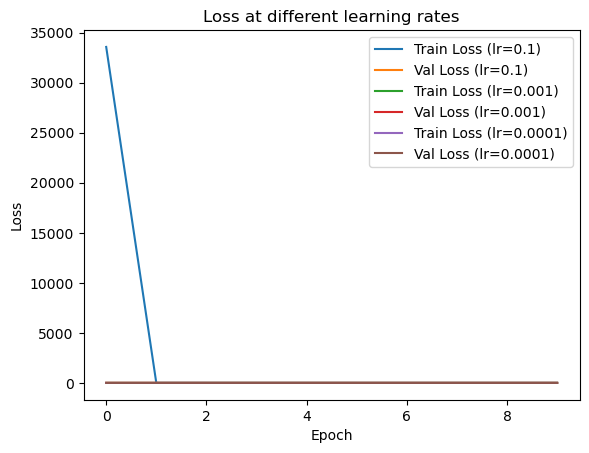

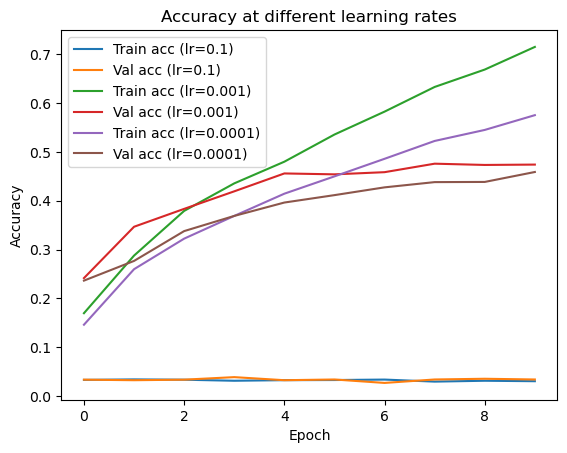

In [35]:
# Your graph

# Now plot the loss and accuracy for each learning rate

plt.plot(history_dropout_1['train_loss'], label=f'Train Loss (lr=0.1)')
plt.plot(history_dropout_1['val_loss'], label=f'Val Loss (lr=0.1)')
plt.plot(history_dropout_001['train_loss'], label=f'Train Loss (lr=0.001)')
plt.plot(history_dropout_001['val_loss'], label=f'Val Loss (lr=0.001)')    
plt.plot(history_dropout_0001['train_loss'], label=f'Train Loss (lr=0.0001)')
plt.plot(history_dropout_0001['val_loss'], label=f'Val Loss (lr=0.0001)')        
plt.title('Loss at different learning rates')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history_dropout_1['train_acc'], label=f'Train acc (lr=0.1)')
plt.plot(history_dropout_1['val_acc'], label=f'Val acc (lr=0.1)')
plt.plot(history_dropout_001['train_acc'], label=f'Train acc (lr=0.001)')
plt.plot(history_dropout_001['val_acc'], label=f'Val acc (lr=0.001)')    
plt.plot(history_dropout_0001['train_acc'], label=f'Train acc (lr=0.0001)')
plt.plot(history_dropout_0001['val_acc'], label=f'Val acc (lr=0.0001)')  
plt.title('Accuracy at different learning rates')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


### 3 Model testing [10 marks]
Online evaluation of your model performance on the test set. 

> Prepare the dataloader for the testset.

> Write evaluation code for writing predictions.

> Upload it to Kaggle submission page (6 marks)


#### 3.1 Test class and predictions (4 marks)

> Build a test class, prepare a test dataloader and generate predictions

Create a PyTorch ```Dataset``` for the unlabeled test data in the test_set folder of the Kaggle competition and generate predictions using your final model. Test data can be downloaded [here](https://www.kaggle.com/competitions/comp5623m-artificial-intelligence/data?select=test_set).

In [27]:
from torch.utils.data import Dataset

class TestDataset(Dataset):
    def __init__(self, directory, transform=None):
        self.directory = directory
        self.transform = transform
        self.images = self.load_dataset()


    def load_dataset(self):
        images = []

        for img_name in os.listdir(self.directory):
            img_path = os.path.join(self.directory, img_name)
            images.append((img_path, img_name))  # Append both path and name as a tuple
        return images

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path,img_name = self.images[idx]
        image = Image.open(img_path).convert('RGB')

        if self.transform:
            image = self.transform(image)

        return image,img_name

test_data_path = 'data/test_set'
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize image to desired size
    transforms.ToTensor(),           # Convert image to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize image
])

test_dataset = TestDataset(directory=test_data_path, transform=test_transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define your model
model_cnn_dropout.eval()

ImprovedCNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU()
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=8192, out_features=128, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
  (fc2): Linear(in_features=128, out_features=30, bias=True)
)

In [30]:
# Your code here! 
import pandas as pd
import torch

# Set the model to evaluation mode
test_ids = []
pred_categories = []

with torch.no_grad():
    for data in test_loader:
        images, ids = data
        images = images.to(device)

        outputs = model_cnn_dropout(images)
        _, predicted = torch.max(outputs, 1)

        # Ensure ids is unpacked from the tuple and then convert to a list
        ids = list(ids)
        
        test_ids.extend(ids)
        pred_categories.extend(predicted.cpu().numpy().tolist())
        pred_categories = pred_categories[:1500]

print(len(test_ids))
print(len(pred_categories))

print(test_ids[:5])
print(pred_categories[:5])

# Create a DataFrame with the results
submission_df = pd.DataFrame({
    'Id': test_ids,
    'Category': pred_categories
})

submission_file_name = 'mm23m2ia.csv'
submission_df.to_csv(submission_file_name, index=False)

1500
1500
['c5693b7d_ab8f.JPEG', '9e70a764_2962.JPEG', 'b54e8c45_5503.JPEG', 'fe6b0876_df17.JPEG', 'e57c80f8_247c.JPEG']
[23, 6, 2, 13, 29]


#### 3.2 Prepare your submission and upload to Kaggle  (6 marks)

Save all test predictions to a CSV file and submit it to the private class Kaggle competition. **Please save your test CSV file submissions using your student username (the one with letters, e.g., ``sc15jb``, not the ID with only numbers)**, for example, `sc15jb.csv`. That will help us to identify your submissions.

The CSV file must contain only two columns: ‘Id’ and ‘Category’ (predicted class ID) as shown below:

```txt
Id,Category
28d0f5e9_373c.JPEG,2
bbe4895f_40bf.JPEG,18
```

The ‘Id’ column should include the name of the image. It is important to keep the same name as the one on the test set. Do not include any path, just the name of file (with extension). Your csv file must contain 1501 rows, one for each image on test set and 1 row for the headers. [To submit please click here.](https://www.kaggle.com/t/917fe52f6a3c4855880a24b34f26db07)

> You may submit multiple times. We will use your personal top entry for allocating marks for this [6 marks]. 


In [58]:
import pandas as pd

# Assuming all_predictions is a list containing the predicted labels for each test sample
# Assuming test_dataset.image_files contains the filenames of the test images
# Combine filenames and predictions
submission_df = pd.DataFrame({'Id': test_dataset.image_files, 'Category': all_predictions})

# Save the submission dataframe to a CSV file
submission_df.to_csv('mm23m2ia.csv', index=False)  

print("Submission file saved successfully.")



### 4 Model Fine-tuning/transfer learning on CIFAR10 dataset  [16 marks]

Fine-tuning is a way of applying or utilizing transfer learning. It is a process that takes a model that has already been trained for one given task and then tunes or tweaks the model to make it perform a second similar task. You can perform fine-tuning in following fashion:

- Train an entire model: Start training model from scratch (large dataset, more computation)

- Train some layers, freeze others: Lower layer features are general (problem independent) while higher layer features are specific (problem dependent – freeze)

- Freeze convolution base and train only last FC layers (small dataset and lower computation) 

> **Configuring your dataset**
   - Download your dataset using ``torchvision.datasets.CIFAR10`` [explained here](https://pytorch.org/vision/stable/generated/torchvision.datasets.CIFAR10.html)
   - Split training dataset into training and validation set similar to above. *Note that the number of categories here is only 10*


In [14]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

# Define transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to match AlexNet input
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Download and load the CIFAR10 training and test datasets
train_dataset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Splitting the training dataset into training and validation sets
train_size = int(0.8 * len(train_dataset))
validation_size = len(train_dataset) - train_size
train_dataset, validation_dataset = random_split(train_dataset, [train_size, validation_size])

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
validation_loader = DataLoader(validation_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


Files already downloaded and verified
Files already downloaded and verified


> Load pretrained AlexNet from PyTorch - use model copies to apply transfer learning in different configurations

In [18]:
import torchvision.models as models
import torch.nn as nn

# Function to load and modify AlexNet for CIFAR10 with different configurations
def get_alexnet_model(configuration):
    # Load pretrained AlexNet
    alexnet = models.alexnet(pretrained=True)
    # Modify the classifier for CIFAR10 (10 classes)
    num_features = alexnet.classifier[6].in_features
    alexnet.classifier[6] = nn.Linear(num_features, 10)
    
    if configuration == 'frozen_conv_base':
        # Freeze convolutional layers
        for param in alexnet.features.parameters():
            param.requires_grad = False
    
    return alexnet


In [19]:
def train_model(model, train_loader, validation_loader, criterion, optimizer, num_epochs=10, device='mps'):
    model.to(device)
    training_losses = []
    validation_losses = []
    training_accuracies = []
    validation_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0
        
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        training_loss = running_loss / len(train_loader.dataset)
        training_accuracy = 100 * correct_train / total_train
        training_losses.append(training_loss)
        training_accuracies.append(training_accuracy)

        # Validation phase
        model.eval()
        validation_loss = 0.0
        correct_val = 0
        total_val = 0
        with torch.no_grad():
            for inputs, labels in validation_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                validation_loss += loss.item() * inputs.size(0)
                _, predicted = torch.max(outputs.data, 1)
                total_val += labels.size(0)
                correct_val += (predicted == labels).sum().item()
                
        validation_loss = validation_loss / len(validation_loader.dataset)
        validation_accuracy = 100 * correct_val / total_val
        validation_losses.append(validation_loss)
        validation_accuracies.append(validation_accuracy)

        print(f'Epoch {epoch+1}/{num_epochs} - Training Loss: {training_loss:.4f}, Training Accuracy: {training_accuracy:.2f}%, Validation Loss: {validation_loss:.4f}, Validation Accuracy: {validation_accuracy:.2f}%')
    
    return training_losses, training_accuracies, validation_losses, validation_accuracies


#### 4.1 Apply transfer learning with pretrained model weights (6 marks)


> Configuration 1: No frozen layers

In [20]:
import torch.optim as optim
import matplotlib.pyplot as plt

# Device configuration
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")

# Configuration 1: No frozen layers
model_no_frozen = get_alexnet_model('no_frozen_layers').to(device)
optimizer_no_frozen = optim.SGD(model_no_frozen.parameters(), lr=0.001, momentum=0.9)

training_losses_no_frozen, training_accuracies_no_frozen, validation_losses_no_frozen, validation_accuracies_no_frozen = train_model(model_no_frozen, train_loader, validation_loader, criterion, optimizer_no_frozen)



Epoch 1/10 - Training Loss: 0.6214, Training Accuracy: 78.47%, Validation Loss: 0.4040, Validation Accuracy: 85.97%
Epoch 2/10 - Training Loss: 0.3898, Training Accuracy: 86.50%, Validation Loss: 0.3675, Validation Accuracy: 87.33%
Epoch 3/10 - Training Loss: 0.3111, Training Accuracy: 89.09%, Validation Loss: 0.3682, Validation Accuracy: 87.28%
Epoch 4/10 - Training Loss: 0.2608, Training Accuracy: 90.76%, Validation Loss: 0.3110, Validation Accuracy: 89.06%
Epoch 5/10 - Training Loss: 0.2243, Training Accuracy: 92.21%, Validation Loss: 0.2908, Validation Accuracy: 90.11%
Epoch 6/10 - Training Loss: 0.1906, Training Accuracy: 93.20%, Validation Loss: 0.3114, Validation Accuracy: 89.44%
Epoch 7/10 - Training Loss: 0.1633, Training Accuracy: 94.05%, Validation Loss: 0.3016, Validation Accuracy: 89.64%
Epoch 8/10 - Training Loss: 0.1380, Training Accuracy: 95.11%, Validation Loss: 0.3179, Validation Accuracy: 89.89%
Epoch 9/10 - Training Loss: 0.1189, Training Accuracy: 95.80%, Validatio

#### 4.2 Fine-tuning model with frozen layers (6 marks)

> Configuration 2: Frozen base convolution blocks

In [21]:

# Configuration 2: Frozen base convolution blocks
model_frozen_conv_base = get_alexnet_model('frozen_conv_base').to(device)
optimizer_frozen_conv_base = optim.SGD(filter(lambda p: p.requires_grad, model_frozen_conv_base.parameters()), lr=0.001, momentum=0.9)

training_losses_frozen_conv_base, training_accuracies_frozen_conv_base, validation_losses_frozen_conv_base, validation_accuracies_frozen_conv_base = train_model(model_frozen_conv_base, train_loader, validation_loader, criterion, optimizer_frozen_conv_base)


Epoch 1/10 - Training Loss: 0.7375, Training Accuracy: 74.01%, Validation Loss: 0.5415, Validation Accuracy: 81.02%
Epoch 2/10 - Training Loss: 0.5594, Training Accuracy: 80.30%, Validation Loss: 0.4959, Validation Accuracy: 82.61%
Epoch 3/10 - Training Loss: 0.4973, Training Accuracy: 82.60%, Validation Loss: 0.4571, Validation Accuracy: 84.19%
Epoch 4/10 - Training Loss: 0.4555, Training Accuracy: 83.85%, Validation Loss: 0.4344, Validation Accuracy: 85.11%
Epoch 5/10 - Training Loss: 0.4245, Training Accuracy: 84.93%, Validation Loss: 0.4225, Validation Accuracy: 85.52%
Epoch 6/10 - Training Loss: 0.3956, Training Accuracy: 86.18%, Validation Loss: 0.4182, Validation Accuracy: 85.76%
Epoch 7/10 - Training Loss: 0.3743, Training Accuracy: 86.67%, Validation Loss: 0.4187, Validation Accuracy: 85.25%
Epoch 8/10 - Training Loss: 0.3515, Training Accuracy: 87.58%, Validation Loss: 0.4105, Validation Accuracy: 85.86%
Epoch 9/10 - Training Loss: 0.3341, Training Accuracy: 88.29%, Validatio

#### 4.3 Compare above configurations and comment on performances. (4 marks)

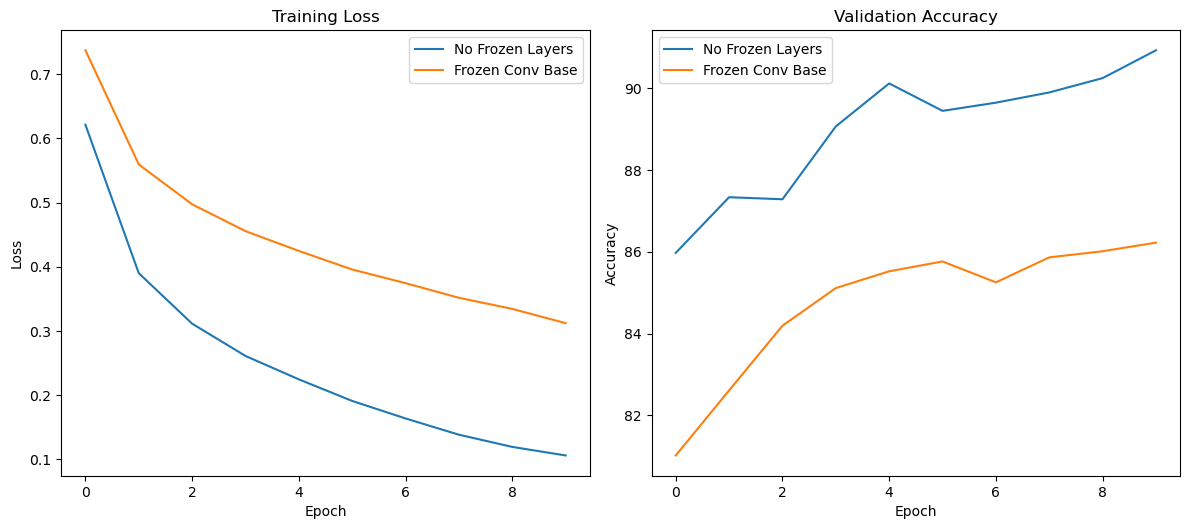

In [22]:

# Plotting
plt.figure(figsize=(12, 10))

# Training loss plots
plt.subplot(2, 2, 1)
plt.plot(training_losses_no_frozen, label='No Frozen Layers')
plt.plot(training_losses_frozen_conv_base, label='Frozen Conv Base')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Validation accuracy plots
plt.subplot(2, 2, 2)
plt.plot(validation_accuracies_no_frozen, label='No Frozen Layers')
plt.plot(validation_accuracies_frozen_conv_base, label='Frozen Conv Base')
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


From above graphs, we can see that the training loss decreases and accuracy increases as the number of epochs increases. But, Configuration 1 performs better than Configuration 2, in regards to the accuracy. Meanwhile, the time taken to run the configuration 2 is less and efficient than configuration 1.

### Part II: Image Captioning using RNN [30 marks]



### Motivation 

Through this part of assessment you will:

> 1. Understand the principles of text pre-processing and vocabulary building (provided).
> 2. Gain experience working with an image to text model.
> 3. Use and compare text similarity metrics for evaluating an image to text model, and understand evaluation challenges.

#### Dataset
This assessment will use a subset of the [COCO "Common Objects in Context" dataset](https://cocodataset.org/) for image caption generation. COCO contains 330K images, of 80 object categories, and at least five textual reference captions per image. Our subset consists of nearly 5070 of these images, each of which has five or more different descriptions of the salient entities and activities, and we will refer to it as COCO_5070.

To download the data:

> 1. **Images and annotations**: download the zipped file provided in the link here as [``COMP5625M_data_assessment_2.zip``](https://leeds365-my.sharepoint.com/:u:/g/personal/scssali_leeds_ac_uk/EWWzE-_AIrlOkvOKxH4rjIgBF_eUx8KDJMPKM2eHwCE0dg?e=DdX62H). 

``Info only:`` To understand more about the COCO dataset you can look at the [download page](https://cocodataset.org/#download). We have already provided you with the "2017 Train/Val annotations (241MB)" but our image subset consists of fewer images compared to orginial COCO dataset. So, no need to download anything from here! 

> 2. **Image meta data**: as our set is a subset of full COCO dataset, we have created a CSV file containing relevant meta data for our particular subset of images. You can download it also from Drive, "coco_subset_meta.csv" at the same link as 1.

#### Submission

You can either submit the same file or make a two separate .ipython notebook files zipped in the submission (please name as ``yourstudentusername_partI.ipynb`` and ``yourstudentusername_partII.ipynb``). 

**Final note:**

> **Please include in this notebook everything that you would like to be marked, including figures. Under each section, put the relevant code containing your solution. You may re-use functions you defined previously, but any new code must be in the relevant section.** Feel free to add as many code cells as you need under each section.


The basic principle of our image-to-text model is as pictured in the diagram below, where an Encoder network encodes the input image as a feature vector by providing the outputs of the last fully-connected layer of a pre-trained CNN (we use [ResNet50](https://arxiv.org/abs/1512.03385)). This pretrained network has been trained on the complete ImageNet dataset and is thus able to recognise common objects. 

You can alternatively use the COCO trained pretrained weights from [PyTorch](https://pytorch.org/vision/stable/models.html). One way to do this is use the "FasterRCNN_ResNet50_FPN_V2_Weights.COCO_V1" but use e.g., "resnet_model = model.backbone.body". Alternatively, you can use the checkpoint from your previous coursework where you fine-tuned to COCO dataset. 

These features are then fed into a Decoder network along with the reference captions. As the image feature dimensions are large and sparse, the Decoder network includes a linear layer which downsizes them, followed by *a batch normalisation layer to speed up training*. Those resulting features, as well as the reference text captions, are then passed into a recurrent network (we will use an **RNNs** in this assessment). 

The reference captions used to compute loss are represented as numerical vectors via an **embedding layer** whose weights are learned during training.

<!-- ![Encoder Decoder](comp5625M_figure.jpg) -->

<div>
<center><img src="comp5625M_figure.jpg" width="1000"/></center>
</div>


### Instructions for creating vocabulary 

A helper function file ``helperDL.py`` is provided that includes all the functions that will do the following for you. You can easily import these functions in the exercise, most are already done for you!  

> 1. Extracting image features (a trained checkpoint is provided ``resnet50_caption.pt`` for you to download and use it for training your RNN)
> 2. Text preparation of training and validation data is provided

In [17]:
import torch
import torch.nn as nn
from torchvision import transforms
import torchvision.models as models
from torch.utils.data import Dataset
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
import matplotlib.pyplot as plt
from collections import Counter
import os
import numpy as np

In [18]:
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print('Using device:', device)

Using device: mps


**Please refer to the submission section at the top of this notebook to prepare your submission.**


In [20]:
# Load the feature map provided to you
features_map = torch.load('resnet50_caption.pt', map_location=device)

#### 5 Train DecoderRNN [20 marks]

> 5.1 Design a RNN-based decoder (10 marks)

> 5.2 Train your model with precomputed features (10 Marks)

##### 5.1 Design a RNN-based decoder (10 marks)

Read through the ```DecoderRNN``` model below. First, complete the decoder by adding an ```rnn``` layer to the decoder where indicated, using [the PyTorch API as reference](https://pytorch.org/docs/stable/nn.html#rnn).

Keep all the default parameters except for ```batch_first```, which you may set to True.

In particular, understand the meaning of ```pack_padded_sequence()``` as used in ```forward()```. Refer to the [PyTorch ```pack_padded_sequence()``` documentation](https://pytorch.org/docs/stable/generated/torch.nn.utils.rnn.pack_padded_sequence.html).


In [21]:
import json
import pandas as pd

with open('coco/annotations2017/captions_train2017.json', 'r') as json_file:
    data = json.load(json_file)
    
df = pd.DataFrame.from_dict(data["annotations"])
df.head()

,image_id,id,caption
0,203564,37,A bicycle replica with a clock as the front wh...
1,322141,49,A room with blue walls and a white sink and door.
2,16977,89,A car that seems to be parked illegally behind...
3,106140,98,A large passenger airplane flying through the ...
4,106140,101,There is a GOL plane taking off in a partly cl...


In [22]:
coco_subset = pd.read_csv("coco_subset_meta.csv")
new_data = pd.DataFrame( data['annotations'])
new_coco = coco_subset.rename(columns={'id':'image_id'})
new_coco.drop_duplicates('file_name',keep='first',inplace=True)

new_subset = new_data.sort_values(['image_id'], ascending=True)
# Get all the reference captions
new_file = pd.merge(new_coco,new_subset,how = 'inner', on = 'image_id')
new_file = new_file[['image_id','id','caption','file_name']]
new_file = new_file.sort_values(['image_id'], ascending = True)
new_file.head(10)

,image_id,id,caption,file_name
16755,9,661611,Closeup of bins of food that include broccoli ...,000000000009.jpg
16759,9,661977,A meal is presented in brightly colored plasti...,000000000009.jpg
16758,9,663627,there are containers filled with different kin...,000000000009.jpg
16757,9,666765,"Colorful dishes holding meat, vegetables, frui...",000000000009.jpg
16756,9,667602,A bunch of trays that have different food.,000000000009.jpg
9634,25,127238,A giraffe mother with its baby in the forest.,000000000025.jpg
9633,25,127076,A giraffe standing up nearby a tree,000000000025.jpg
9635,25,133058,Two giraffes standing in a tree filled area.,000000000025.jpg
9636,25,133676,A giraffe standing next to a forest filled wit...,000000000025.jpg
9637,25,122312,A giraffe eating food from the top of the tree.,000000000025.jpg


In [23]:
# getting the clearn clean - e.g., converting all uppercases to lowercases
new_file["clean_caption"] = ""
from helperDL import gen_clean_captions_df
new_file = gen_clean_captions_df(new_file)
new_file.head(10)

,image_id,id,caption,file_name,clean_caption
16755,9,661611,Closeup of bins of food that include broccoli ...,000000000009.jpg,closeup of bins of food that include broccoli ...
16759,9,661977,A meal is presented in brightly colored plasti...,000000000009.jpg,a meal is presented in brightly colored plasti...
16758,9,663627,there are containers filled with different kin...,000000000009.jpg,there are containers filled with different kin...
16757,9,666765,"Colorful dishes holding meat, vegetables, frui...",000000000009.jpg,colorful dishes holding meat vegetables fruit ...
16756,9,667602,A bunch of trays that have different food.,000000000009.jpg,a bunch of trays that have different food
9634,25,127238,A giraffe mother with its baby in the forest.,000000000025.jpg,a giraffe mother with its baby in the forest
9633,25,127076,A giraffe standing up nearby a tree,000000000025.jpg,a giraffe standing up nearby a tree
9635,25,133058,Two giraffes standing in a tree filled area.,000000000025.jpg,two giraffes standing in a tree filled area
9636,25,133676,A giraffe standing next to a forest filled wit...,000000000025.jpg,a giraffe standing next to a forest filled wit...
9637,25,122312,A giraffe eating food from the top of the tree.,000000000025.jpg,a giraffe eating food from the top of the tree


In [24]:
##### Spilt your training, validation and test dataset with indexes to each set
from helperDL import split_ids
train_id, valid_id, test_id = split_ids(new_file['image_id'].unique())
print("training:{}, validation:{}, test:{}".format(len(train_id), len(valid_id), len(test_id)))

training:3547, validation:506, test:1015


In [25]:
train_set = new_file.loc[new_file['image_id'].isin(train_id)]
valid_set = new_file.loc[new_file['image_id'].isin(valid_id)]
test_set = new_file.loc[new_file['image_id'].isin(test_id)]

In [26]:
class Vocabulary(object):
    """ Simple vocabulary wrapper which maps every unique word to an integer ID. """
    def __init__(self):
        # intially, set both the IDs and words to dictionaries with special tokens
        self.word2idx = {'<pad>': 0, '<unk>': 1, '<end>': 2}
        self.idx2word = {0: '<pad>', 1: '<unk>', 2: '<end>'}
        self.idx = 3

    def add_word(self, word):
        # if the word does not already exist in the dictionary, add it
        if not word in self.word2idx:
            self.word2idx[word] = self.idx
            self.idx2word[self.idx] = word
            # increment the ID for the next word
            self.idx += 1

    def __call__(self, word):
        # if we try to access a word not in the dictionary, return the id for <unk>
        if not word in self.word2idx:
            return self.word2idx['<unk>']
        return self.word2idx[word]

    def __len__(self):
        return len(self.word2idx)

In [27]:
### build vocabulariy for each set - train, val and test 
# you will be using to create dataloaders
from helperDL import build_vocab

# create a vocab instance
vocab = Vocabulary()
vocab_train = build_vocab(train_id, new_file, vocab)
vocab_valid = build_vocab(valid_id, new_file, vocab)
vocab_test = build_vocab(test_id, new_file, vocab)

vocab = vocab_train # using only training samples as vocabulary as instructed above
print("Total vocabulary size: {}".format(len(vocab_train)))


Total vocabulary size: 2349


In [28]:
# They can also join the train and valid captions but they will need to run vocabulary after concatenation
import numpy as np
vocab = build_vocab(np.concatenate((train_id, valid_id), axis=0), new_file, vocab) #---> overrighting
len(vocab)

2529

Instantiate a ```DataLoader``` for your image feature and caption dataset. ``helperDL.py`` file includes all the required functions

We need to overwrite the default PyTorch collate_fn() because our 
ground truth captions are sequential data of varying lengths. The default
collate_fn() does not support merging the captions with padding.

You can read more about it here:
https://pytorch.org/docs/stable/data.html#dataloader-collate-fn. 


In [29]:
from helperDL import EncoderCNN  
model = EncoderCNN() 
print(model)

/Applications/anaconda3/envs/PyTorch/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Applications/anaconda3/envs/PyTorch/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


EncoderCNN(
  (resnet): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64

In [37]:
''' Load the saved image feature maps and trained model ("provided to you") 

# ---> your entry here (make sure that the path is correct)
features = torch.load("coco_features.pt")

# also load the model ckpt and udate the model state dict of the base model
# ---> your entry here (make sure that the path is correct)
checkpoint = torch.load("ckpt file here") 
model.load_state_dict(checkpoint['model_state_dict'])
'''

' Load the saved image feature maps and trained model ("provided to you") \n\n# ---> your entry here (make sure that the path is correct)\nfeatures = torch.load("coco_features.pt")\n\n# also load the model ckpt and udate the model state dict of the base model\n# ---> your entry here (make sure that the path is correct)\ncheckpoint = torch.load("ckpt file here") \nmodel.load_state_dict(checkpoint[\'model_state_dict\'])\n'

In [30]:
##### Preparing the train, val and test dataloaders
from helperDL import COCO_Features
from helperDL import caption_collate_fn


# Create a dataloader for train
dataset_train = COCO_Features(
    df=train_set,
    vocab=vocab,
    features=features_map,
)

train_loader = torch.utils.data.DataLoader(
    dataset_train,
    batch_size=32,
    shuffle=True,
    num_workers=0, 
    collate_fn=caption_collate_fn, # explicitly overwrite the collate_fn
)

# Create a dataloader for valid
dataset_valid = COCO_Features(
    df=valid_set,
    vocab=vocab,
    features=features_map,
)

valid_loader = torch.utils.data.DataLoader(
    dataset_valid,
    batch_size=32,
    shuffle=True,
    num_workers=0, 
    collate_fn=caption_collate_fn, # explicitly overwrite the collate_fn
)

In [31]:

EMBED_SIZE = 256
HIDDEN_SIZE = 512
NUM_LAYERS = 1
LR = 0.001
NUM_EPOCHS = 2
LOG_STEP = 10
MAX_SEQ_LEN = 37

#### 5.1 Design a RNN-based decoder (10 marks)

Read through the ```DecoderRNN``` model below. First, complete the decoder by adding an ```rnn``` layer to the decoder where indicated, using [the PyTorch API as reference](https://pytorch.org/docs/stable/nn.html#rnn).

Keep all the default parameters except for ```batch_first```, which you may set to True.

In particular, understand the meaning of ```pack_padded_sequence()``` as used in ```forward()```. Refer to the [PyTorch ```pack_padded_sequence()``` documentation](https://pytorch.org/docs/stable/generated/torch.nn.utils.rnn.pack_padded_sequence.html).

In [32]:
import torch
import torch.nn as nn
from torch.nn.utils.rnn import pack_padded_sequence

class DecoderRNN(nn.Module):
    def __init__(self, vocab_size, embed_size=256, hidden_size=512, num_layers=1, max_seq_length=47):
        super(DecoderRNN, self).__init__()
        self.embed_size = embed_size
        self.hidden_size = hidden_size
        self.vocab_size = vocab_size
        self.num_layers = num_layers
        self.max_seq_length = max_seq_length
        
        # Resizing the features from the CNN to the desired embed size
        self.resize = nn.Linear(2048, embed_size)  # Assuming feature size of 2048
        
        # Batch normalization
        self.bn = nn.BatchNorm1d(embed_size, momentum=0.01)
        
        # Embedding layer
        self.embed = nn.Embedding(vocab_size, embed_size)
        
        # RNN layer
        self.rnn = nn.RNN(embed_size, hidden_size, num_layers, batch_first=True)
        
        # Linear layer to get probabilities over the vocabulary
        self.linear = nn.Linear(hidden_size, vocab_size)

    def forward(self, features, captions, lengths):
        embeddings = self.embed(captions)
        im_features = self.bn(self.resize(features))
        
        embeddings = torch.cat((im_features.unsqueeze(1), embeddings), 1)
        packed = pack_padded_sequence(embeddings, lengths, batch_first=True, enforce_sorted=False)
        
        hiddens, _ = self.rnn(packed)
        outputs = self.linear(hiddens[0])
        return outputs
    
    def sample(self, features, states=None):
        sampled_ids = []
        inputs = self.bn(self.resize(features)).unsqueeze(1)
        for i in range(self.max_seq_length):
            hiddens, states = self.rnn(inputs, states)
            outputs = self.linear(hiddens.squeeze(1))
            _, predicted = outputs.max(1)
            sampled_ids.append(predicted)
            inputs = self.embed(predicted).unsqueeze(1)
        sampled_ids = torch.stack(sampled_ids, 1)
        return sampled_ids


In [50]:
# instantiate decoder
decoder = DecoderRNN(len(vocab), embed_size=EMBED_SIZE, hidden_size=HIDDEN_SIZE, num_layers=NUM_LAYERS).to(device)

##### 5.2 Train your model with precomputed features (10 marks)

Train the decoder by passing the features, reference captions, and targets to the decoder, then computing loss based on the outputs and the targets. Note that when passing the targets and model outputs to the loss function, the targets will also need to be formatted using ```pack_padded_sequence()```.

We recommend a batch size of around 64 (though feel free to adjust as necessary for your hardware).

**We strongly recommend saving a checkpoint of your trained model after training so you don't need to re-train multiple times.**

Display a graph of training and validation loss over epochs to justify your stopping point.

In [51]:
import numpy as np
import torch
from torch.nn.utils.rnn import pack_padded_sequence
from torch import nn, optim

# Assuming `decoder` is your model, `train_loader` & `valid_loader` are your data loaders
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(decoder.parameters(), lr=0.001)

NUM_EPOCHS = 2
LOG_STEP = 100
stats = np.zeros((NUM_EPOCHS, 2))

for epoch in range(NUM_EPOCHS):
    total_loss = 0
    decoder.train()
    
    for i, (features, captions, lengths) in enumerate(train_loader):
        features, captions = features.to(device), captions.to(device)
        
        # Zero the parameter gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = decoder(features, captions, lengths)
        targets = pack_padded_sequence(captions, lengths, batch_first=True)[0]
        
        # Compute loss
        loss = criterion(outputs, targets)
        
        # Backward and optimize
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
        
        if i % LOG_STEP == 0:
            print(f"Epoch [{epoch+1}/{NUM_EPOCHS}], Step [{i}/{len(train_loader)}], Loss: {loss.item():.4f}")
    
    # Calculate average training loss for the epoch
    avg_train_loss = total_loss / len(train_loader)
    stats[epoch, 0] = avg_train_loss
    total_loss = 0  # Reset for validation loss calculation
    
    # Validation phase
    decoder.eval()
    with torch.no_grad():
        for i, (features, captions, lengths) in enumerate(valid_loader):
            features, captions = features.to(device), captions.to(device)
            outputs = decoder(features, captions, lengths)
            targets = pack_padded_sequence(captions, lengths, batch_first=True)[0]
            loss = criterion(outputs, targets)
            total_loss += loss.item()
    
    avg_valid_loss = total_loss / len(valid_loader)
    stats[epoch, 1] = avg_valid_loss
    
    print(f"Epoch [{epoch+1}/{NUM_EPOCHS}]: Train Loss: {avg_train_loss:.4f}, Valid Loss: {avg_valid_loss:.4f}")


Epoch [1/2], Step [0/555], Loss: 7.8547
Epoch [1/2], Step [100/555], Loss: 4.6534
Epoch [1/2], Step [200/555], Loss: 3.7380
Epoch [1/2], Step [300/555], Loss: 3.7762
Epoch [1/2], Step [400/555], Loss: 3.6777
Epoch [1/2], Step [500/555], Loss: 3.5217
Epoch [1/2]: Train Loss: 3.8919, Valid Loss: 3.3023
Epoch [2/2], Step [0/555], Loss: 3.2369
Epoch [2/2], Step [100/555], Loss: 3.0521
Epoch [2/2], Step [200/555], Loss: 2.8651
Epoch [2/2], Step [300/555], Loss: 2.8797
Epoch [2/2], Step [400/555], Loss: 2.8827
Epoch [2/2], Step [500/555], Loss: 3.1704
Epoch [2/2]: Train Loss: 2.9716, Valid Loss: 3.0445


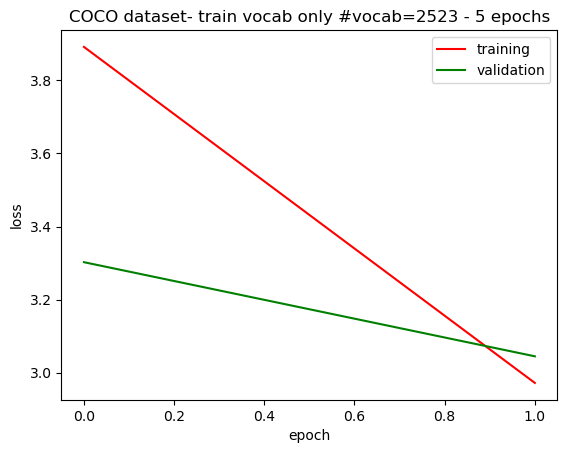

In [52]:
fig = plt.figure()

plt.plot(stats[:,0], 'r', label = 'training', )
plt.plot(stats[:,1], 'g', label = 'validation' )
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title(f"COCO dataset- train vocab only #vocab={len(vocab)} - 5 epochs")
fig.savefig("coco_train_vocab_only.png")
plt.show()

The above graph reoresents the loss function of training and validation dataset. We can see both the lines decrease as the number of epochs increases, which would explain the accuracy of our model's prediction. There are no signs of overfitting as both of the lines decreases together. Overall, the model looks stable as there is no wild fluctuations in loss functions.

In [53]:
# save model after training
decoder_ckpt = torch.save(decoder, "new_coco_subset_assessment_decoder.ckpt")

In [33]:
decoder = torch.load("new_coco_subset_assessment_decoder.ckpt")

### 6 Test prediction and evaluation [10 marks] 

#### 6.1 Generate predictions on test data (4 marks)

Display 4 sample test images containing different objects, along with your model’s generated captions and all the reference captions for each.

> Remember that everything **displayed** in the submitted notebook and .html file will be marked, so be sure to run all relevant cells.

In [43]:
from PIL import Image
class COCOImagesDataset(Dataset):
    def __init__(self, df, transform=None):
        self.df = df
        self.transform = transform
        self.pth = 'coco/images/'

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img_name = self.df.iloc[idx, 3]
        caption = self.df.iloc[idx, 4]
        
        img_path = os.path.join(self.pth, img_name)
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image, caption

In [45]:
data_transform = transforms.Compose([ 
    transforms.Resize(224),     
    transforms.CenterCrop(224), 
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406),   # using ImageNet norms
                         (0.229, 0.224, 0.225))])

dataset_test = COCOImagesDataset(
    df=test_set,
    transform=data_transform,
)
test_loader = torch.utils.data.DataLoader(
    dataset_test,
    batch_size=32,
    shuffle=False,
    num_workers=0)

In [46]:
model.eval()
decoder.eval() # generate caption, eval mode to not influence batchnormncoder.eval()

DecoderRNN(
  (resize): Linear(in_features=2048, out_features=256, bias=True)
  (bn): BatchNorm1d(256, eps=1e-05, momentum=0.01, affine=True, track_running_stats=True)
  (embed): Embedding(2523, 256)
  (rnn): RNN(256, 512, batch_first=True)
  (linear): Linear(in_features=512, out_features=2523, bias=True)
)

In [47]:
# getting functions from helperDL.py
from helperDL import timshow
from helperDL import decode_caption

In [ ]:
IMAGES_TO_SHOW = 4
idx = 0

with torch.no_grad():
    for i, (image, filename) in enumerate(test_loader):
        image = image.to(torch.float32)
        image = image.to(device)
        features = model(image)
        samples = decoder.sample(features).cpu().numpy()
        predictions = samples[0]
        predictions_trimmed = predictions[(predictions != vocab('<start')) & (predictions != vocab('<end>'))]
        captions = decode_caption(predictions_trimmed, vocab)
        print(f"GENERATED: {captions}\n")
        print(f"REFERENCE: {filename[0]}\n")  # Corrected the string formatting here

        print("===================================\n")
        # Display the image
        plt.imshow(image[0].cpu().permute(1, 2, 0))
        plt.axis('off')
        plt.show()

        timshow(image[0].cpu())
        idx += 1
        if idx == IMAGES_TO_SHOW:
            break


#### 6.2 Caption evaluation using cosine similarity (6 marks)

The cosine similarity measures the cosine of the angle between two vectors in n-dimensional space. The smaller the angle, the greater the similarity.

To use the cosine similarity to measure the similarity between the generated caption and the reference captions: 

* Find the embedding vector of each word in the caption 
* Compute the average vector for each caption 
* Compute the cosine similarity score between the average vector of the generated caption and average vector of each reference caption
* Compute the average of these scores 

Calculate the cosine similarity using the model's predictions over the whole test set. 

Display a histogram of the distribution of scores over the test set.

In [ ]:
# your code here
def get_word_embedding(word, embedding_model):
    # Assuming `embedding_model` can return an embedding for a given word
    return embedding_model[word]

def caption_to_avg_vector(caption, embedding_model):
    words = caption.split()  # Split caption into words
    vectors = [get_word_embedding(word, embedding_model) for word in words if word in embedding_model]
    if vectors:
        avg_vector = sum(vectors) / len(vectors)
    else:
        avg_vector = np.zeros(embedding_dimension)  # Assuming embedding dimension is known
    return avg_vector


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def calculate_cosine_similarity(vector1, vector2):
    # Ensure vectors are 2D
    vector1 = vector1.reshape(1, -1)
    vector2 = vector2.reshape(1, -1)
    return cosine_similarity(vector1, vector2)[0][0]


In [ ]:
scores = []
for image, reference_captions in test_dataset:  # Pseudocode for looping over your data
    generated_caption = generate_caption_for_image(image)  # Your method to generate captions
    generated_vector = caption_to_avg_vector(generated_caption, embedding_model)
    
    similarity_scores = []
    for ref_caption in reference_captions:
        ref_vector = caption_to_avg_vector(ref_caption, embedding_model)
        score = calculate_cosine_similarity(generated_vector, ref_vector)
        similarity_scores.append(score)
    
    average_score = sum(similarity_scores) / len(similarity_scores)
    scores.append(average_score)


In [ ]:
import matplotlib.pyplot as plt

plt.hist(scores, bins=20)
plt.title('Distribution of Cosine Similarity Scores')
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')
plt.show()
